<center><h1> Decision Trees </h1></center>
***
![decision_trees](../images/DT.1.png)

 <center><h1>Banknote authentication data set </h1></center>

### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


### Attribute Information:
```python
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 
```

### Importing Libraries

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Importing the Dataset
We will use panda's read_csv method to read our CSV data file. 

In [3]:
dataset = pd.read_csv("../data/bill_authentication.csv") 

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 1
***
### Instructions

* Print to see the number of rows and columns in our dataset.
* Print to check the first five records of the dataset.

In [4]:
print(dataset.shape)  
print(dataset.head())  

(1372, 5)
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 2
***
### Instructions

* Store all the features(independent values) in a variable called `X`
* Store the target variable `Class`(dependent value) in a variable called `y`

In [5]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class']  

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 3
***
### Instructions

* Import `train_test_split` from sklearn model_selection library.
* Split `X` and `y` into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use 
`test_size = 0.20` 

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 4
***
### Instructions

* Import `DecisionTreeClassifier` from sklearn tree library.
* Initialise a Decision tree classifier model with `DecisionTreeClassifier()` and save it to a variable called `classifier`.Pass the parameter `max_depth=2` while initializing the object. (You can also pass the parameter criterion=entropy/criterion=gini. It is criterion=gini by default).
* Fit the classifier on the training data `X_train` and `y_train` using the `fit()` method.
* Using predict method of classifier predict on the test data `X_test` and store in the variable as `y_pred`

In [11]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(max_depth =2,criterion='entropy')  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 6
***
### Instructions

* Use the tree.export_graphviz() module to create the graphic visualization object of the learned tree `classifier` .Input the parameters `classifier`, `out_file=None`, `feature_names=X.columns`, `filled = True`, `class_names=['class_yes','class_no']` and save it as `dot_data`

* Use the pydotplus.graph_from_dot_data() module to draw the graph. Save it as `graph`

* To display the graph we save the above created image into a file and display it using matplotlib as  `Image(graph.create_png())` 

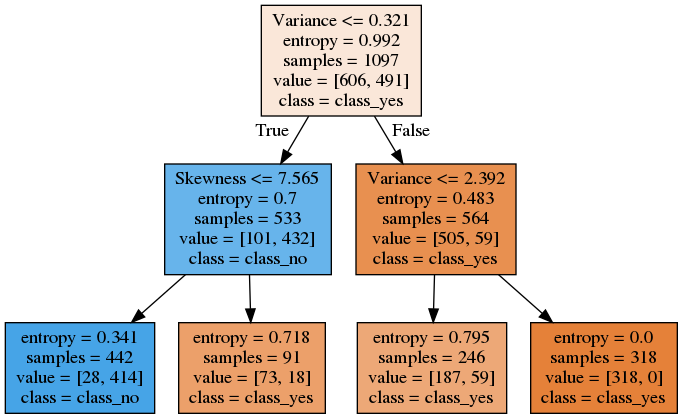

In [13]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=X.columns, filled = True,  
                                class_names=['class_yes','class_no'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 5
***
### Instructions

* From Scikit Learns metrics library import `classification_report` and `confusion_matrix` methods that can be used   to calculate these metrics.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[160   6]
 [  2 107]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       166
          1       0.95      0.98      0.96       109

avg / total       0.97      0.97      0.97       275



From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 8. This is 97.0 % accuracy. Not too bad!

# Quiz 

__Q.1.). Which of the following are not used for deciding the splits in a decision tree ?__<br/>
a. Gini Index<br/>
b. Entropy/Information Gain<br/>
c. ANOVA<br/>
d. Chi-square<br/>
Soln : c.<br/>

__Q.2). Which of the following is Decision Tree known to suffer from ?__<br/>
a. High bias & low variance<br/>
b. Low bias & high variance<br/>
Soln : b.<br/>

__Q.3). A bag consists of 64 blue marbles and 36 red marbles. What is the gini index for the bag?__<br/>
a. 0.4608<br/>
b. 0.4509<br/>
c. 0.3456<br/>
Soln : The formula for gini index is given by
$$Gini Index = \sum_{i=1}^{n}p_{i}(1-p_{i})$$
Thus the gini index is = 0.64(1-0.64) + 0.36(1-0.36) = 0.4608

__Q.4). For the above example what is the value of cross-entropy ?__<br/>
a. 0.5364<br/>
b. 0.3654<br/>
c. 0.6534<br/>
Soln : c.
The cross entropy is given by
$$-\sum_{i=1}^{n}plog_{e}p$$
Thus the cross entropy is = -0.64 x ln(0.64) - 0.36 x ln(0.36) = 0.6534

__Q.5). In which of the scenarios is a gain ratio preferred over Information Gain ?__<br/>
a.). When a categorical variable has very large number of category<br/>
b.). When a categorical variable has very small number of category<br/>
c.). Number of categories is the not the reason<br/>
d.). None of these<br/>
Soln : a.<br/>





# Thank You
***
### Coming up next...
***
- Ensembling & Random Forests

For more queries - Reach out to academics@greyatom.com 